In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

### Step 1: Load,read the data and basic data exploration

In [2]:
#Basic Data Exploration
df=pd.read_csv('/content/bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Now, let's check the shape of the dataset. 

In [3]:
df.shape

(41188, 21)

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [5]:
#checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

From the above, it i clear that there are no null values

In [6]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [7]:
#As ["contact_telephone"]  is a categorical variable. it  can be converted into indicator variable using pd.get_dummies()
dummy=pd.get_dummies(df['contact'],prefix="contact_telephone")
# turns the column comment_disabled into a dummy
dummy

,contact_telephone_cellular,contact_telephone_telephone
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
41183,1,0
41184,1,0
41185,1,0
41186,1,0


In [8]:
#merging the dummy variables/DataFrame into our original dataframe 'df'
df=df.merge(dummy,left_index=True,right_index=True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone_cellular,contact_telephone_telephone
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,0


In [9]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'marital'.
df['marital']= label_encoder.fit_transform(df['marital'])

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone_cellular,contact_telephone_telephone
0,56,housemaid,1,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
1,57,services,1,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
2,37,services,1,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
3,40,admin.,1,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
4,56,services,1,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1


Similarly we replace all the categorical value with a numeric value

In [11]:
df['default']= label_encoder.fit_transform(df['default'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['job']=label_encoder.fit_transform(df['job'])

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contact_telephone_cellular,contact_telephone_telephone
0,56,3,1,basic.4y,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
1,57,7,1,high.school,1,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
2,37,7,1,high.school,0,2,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
3,40,0,1,basic.6y,0,0,0,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1
4,56,7,1,high.school,0,0,2,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,1


In [13]:
#dropping irrelavent features
df.drop(columns=['contact_telephone_cellular','contact'],inplace=True)

In [14]:
df['education']=label_encoder.fit_transform(df['education'])

### Step 2 : Visualization

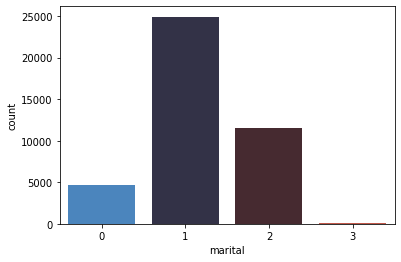

In [15]:
sns.countplot(x="marital",data=df,palette="icefire")

From the above countplot, it is evident that married has more count

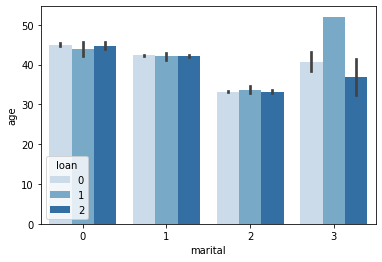

In [16]:
sns.barplot(x='marital',y='age',hue='loan',data=df,palette='Blues')

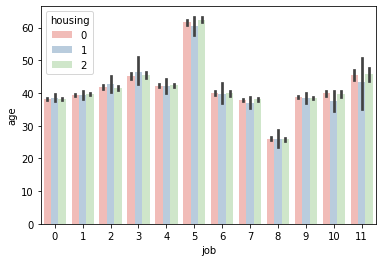

In [17]:
sns.barplot(x='job',y='age',hue='housing',data=df,palette='Pastel1')

In [18]:
df.dtypes

age                              int64
job                              int64
marital                          int64
education                        int64
default                          int64
housing                          int64
loan                             int64
month                           object
day_of_week                     object
duration                         int64
campaign                         int64
pdays                            int64
previous                         int64
poutcome                        object
emp.var.rate                   float64
cons.price.idx                 float64
cons.conf.idx                  float64
euribor3m                      float64
nr.employed                    float64
y                               object
contact_telephone_telephone      uint8
dtype: object

### Step 3 : Building the model

In [19]:
#Importing necessary features
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Now, after reading and understanding the dataset, let's define the input features (X) and output feature (y). In the dataset, the column "y" is our output feature, and the rest of the columns are input features.

In [20]:

X =df.drop(labels=["pdays",'previous','campaign','poutcome','month','day_of_week','cons.conf.idx','cons.price.idx','y','nr.employed','contact_telephone_telephone'], axis = 1)
y =df["y"]

In [21]:
#initializing the model
clf=svm.SVC()

Now next we will define the pair of training and testing patterns by using the train_test_split() method.with test size 30 percent

In [22]:
#performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=1)


In [23]:
clf.fit(X_train,y_train)


SVC()

In [24]:
#predicting
y_pred=clf.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred)

0.8883495145631068

Building the model with defining the values of hyper parameters **C and Gamma** .C is used to control error and Gamma  which is set before the training model and used to give curvature weight of the decision boundary.

In [26]:

clf=svm.SVC(gamma=0.25,C=2)

In [27]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=1)

In [28]:
clf.fit(X_train,y_train)

SVC(C=2, gamma=0.25)

In [29]:
y_pred=clf.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.8754045307443366

Inferences:
    
  The model performs better when there was no initialization of hyper parameters